Part 1 (1)

Dimensions of input X: 6x6

Dimensions of kernel f: 3x3

Parameters of f: 3x3 = 9


In [ ]:
# Part 1 (2)
import numpy as np

X = np.array([
    [7, 5, 0, 0, 3, 2],
    [6, 4, 5, 1, 4, 8],
    [9, 0, 2, 2, 5, 4],
    [6, 3, 4, 7, 9, 8],
    [5, 7, 5, 6, 9, 0],
    [7, 9, 0, 8, 2, 3]
])
f = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

# Dimensions of output: 6-3+1 = 4 --> 4x4
output = np.zeros((4, 4))

for i in range(4):
    for j in range(4):
        output[i, j] = np.sum(X[i:i+3, j:j+3] * f)

print("Convolution output:\n", output)


Convolution output:
 [[ 16.   9.  -4. -18.]
 [ 17.  -5. -10. -12.]
 [ 11.  -9. -17.   2.]
 [  9.  -1. -15.  16.]]


In [ ]:
# Part 1 (3)
pooled_output = np.zeros((2, 2))

for i in range(2):
    for j in range(2):
        pooled_output[i, j] = np.max(output[i*2:i*2+2, j*2:j*2+2])

print("Max-pooling output:\n",pooled_output)

Max-pooling output:
 [[17. -4.]
 [11. 16.]]


In [ ]:
# Preprocess MNIST dataset for Part 2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Part 2 (1)
def regular_cnn():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

model = regular_cnn()
model.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8670 - loss: 0.4133 - val_accuracy: 0.9898 - val_loss: 0.0365
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9822 - loss: 0.0605 - val_accuracy: 0.9927 - val_loss: 0.0277
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9889 - loss: 0.0406 - val_accuracy: 0.9918 - val_loss: 0.0304
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9906 - loss: 0.0320 - val_accuracy: 0.9922 - val_loss: 0.0316
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9931 - loss: 0.0241 - val_accuracy: 0.9937 - val_loss: 0.0284
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9942 - loss: 0.0204 - val_accuracy: 0.9920 - val_loss: 0.0330
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9945 - loss: 0.0176 - val_accuracy: 0.9943 - val_loss: 0.0261
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9951 - loss: 0.0157 - val_accuracy

In [ ]:
# Part 2 (3)
def inverted_cnn():
    model = Sequential()
    model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

model = inverted_cnn()
model.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.8372 - loss: 0.5040 - val_accuracy: 0.9890 - val_loss: 0.0378
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9788 - loss: 0.0737 - val_accuracy: 0.9912 - val_loss: 0.0335
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9844 - loss: 0.0527 - val_accuracy: 0.9922 - val_loss: 0.0292
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9881 - loss: 0.0393 - val_accuracy: 0.9920 - val_loss: 0.0285
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.9894 - loss: 0.0333 - val_accuracy: 0.9930 - val_loss: 0.0277
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9918 - loss: 0.0286 - val_accuracy: 0.9912 - val_loss: 0.0356
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9917 - loss: 0.0289 - val_accuracy: 0.9933 - val_loss: 0.0287
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9924 - loss: 0.0249 - 

In [ ]:
# Part 2 (3)
def hourglass_cnn():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

model = hourglass_cnn()
model.compile(optimizer='RMSProp', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8058 - loss: 0.5833 - val_accuracy: 0.9877 - val_loss: 0.0408
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9805 - loss: 0.0679 - val_accuracy: 0.9900 - val_loss: 0.0319
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9873 - loss: 0.0434 - val_accuracy: 0.9908 - val_loss: 0.0333
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9902 - loss: 0.0337 - val_accuracy: 0.9927 - val_loss: 0.0342
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9932 - loss: 0.0266 - val_accuracy: 0.9925 - val_loss: 0.0283
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9947 - loss: 0.0198 - val_accuracy: 0.9932 - val_loss: 0.0287
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9942 - loss: 0.0192 - val_accuracy: 0.9918 - val_loss: 0.0347
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9947 - loss: 0.0170 - val_accuracy:

**Part 2 Summary of Observations**

1. Regular CNN:

  - Architecture:

    - Filters increase as the network depth increases (32 --> 64 --> 128 --> 256)
    - 2 max-pooling layers
    - Final dense layers with dropout for regularization

  - Potential drawback: the training time was longer due to the increased computation required at deeper layers

2. Inverted CNN:

  - Architecture:

    - Filters decrease with depth (256 --> 128 --> 64 --> 32)
    - 2 max-pooling layers to reduce dimensionality
    - Final dense layer followed by softmax for classification

  - Potential drawback: Similarly, the model's training time was longer that that of the hourglass CNN.

3. Hourglass CNN

  - Architecture:
    - Filters increase and then decrease (32 --> 64 --> 128 --> 64 --> 32)
    - 2 max-pooling layers to reduce dimensionality
    
    - The model arguably performed the best considering accuracy was high across each model and the hourglass CNN in particular had fast training time.

Hyperparameters observation:

- Learning Rate: A learning rate of 0.001 worked best for each network using Adam.
- Batch Size: batch size of 64 seemed to provide a good balance between training time and model generalization.
- Optimizer: though all are high accuracy and functioning models, Adam and RMSProp may slightly outperform SGD in terms of accuracy.
  - SGD test accuracy with the same hyperparameters:
    - Regular CNN: 98.68000149726868 %
    - Inverted CNN: 98.54000210762024 %
    - Hourglass CNN: 98.66999983787537 %
  - Adam test accuracy with the same hyperparameters:
    - Regular CNN: 99.45999979972839 %
    - Inverted CNN: 99.40000176429749 %
    - Hourglass CNN: 99.18000102043152 %
  - RMSProp test accuracy with the same hyperparameters:
    - Regular CNN: 99.25000071525574 %
    - Inverted CNN: 99.37999844551086 %
    - Hourglass CNN: 99.32000041007996 %
- Epochs: 10 epochs were sufficient to reach optimal accuracy with minimal overfitting. If the model seems to start slightly overfitting, it may have been necessary to reduce the number of epochs.



In [ ]:
# Part 3
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.regularizers import l2

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

def lenet_model(learning_rate=0.001):
    model = Sequential([
        Input(shape=(32, 32, 3)),
        Conv2D(6, (5, 5), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=2),
        Conv2D(16, (5, 5), activation='relu', padding='same'),
        MaxPooling2D((2, 2), strides=2),
        Conv2D(120, (5, 5), activation='relu', padding='same'),
        Flatten(),
        Dense(84, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = lenet_model()
lenet_history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3307 - loss: 1.8152 - val_accuracy: 0.5117 - val_loss: 1.3668
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5618 - loss: 1.2306 - val_accuracy: 0.6100 - val_loss: 1.1147
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6400 - loss: 1.0259 - val_accuracy: 0.6177 - val_loss: 1.0862
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6797 - loss: 0.9090 - val_accuracy: 0.6589 - val_loss: 0.9888
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7245 - loss: 0.7991 - val_accuracy: 0.6770 - val_loss: 0.9288
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7487 - loss: 0.7210 - val_accuracy: 0.6686 - val_loss: 0.9791
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7823 - loss: 0.6263 - val_accuracy: 0.6768 - val_loss: 0.9569
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8115 - loss: 0.5371 - val_accuracy: 

In [ ]:
def dense_feedforward_model(learning_rate=0.001):
    model = Sequential([
        Input(shape=(32, 32, 3)),
        Flatten(),
        Dense(6 * 32 * 32, activation='relu'),
        Dense(16 * 16 * 16, activation='relu'),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

dense_model = dense_feedforward_model()
dense_history = dense_model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.2279 - loss: 2.3147 - val_accuracy: 0.3573 - val_loss: 1.7838
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.3667 - loss: 1.7565 - val_accuracy: 0.4086 - val_loss: 1.6435
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4099 - loss: 1.6497 - val_accuracy: 0.4309 - val_loss: 1.5843
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4387 - loss: 1.5675 - val_accuracy: 0.4532 - val_loss: 1.5344
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4602 - loss: 1.5156 - val_accuracy: 0.4403 - val_loss: 1.5724
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4692 - loss: 1.4772 - val_accuracy: 0.4686 - val_loss: 1.4970
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4854 - loss: 1.4366 - val_accuracy: 0.4717 - val_loss: 1.4820
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4975 - loss: 1.4000 - 

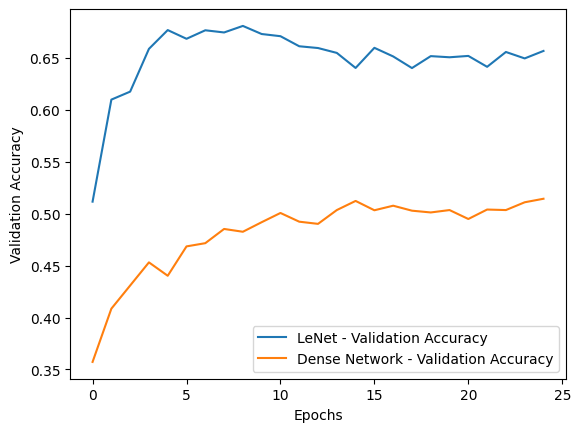

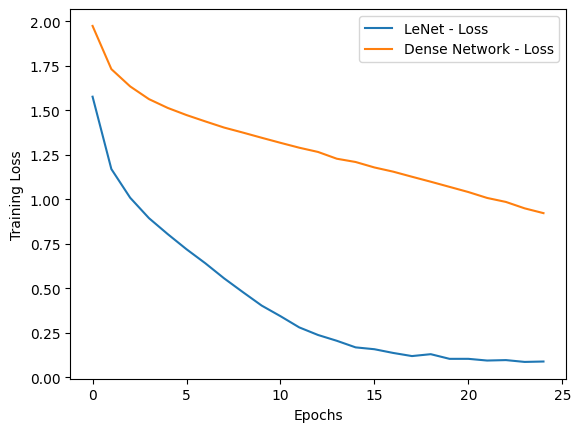

In [ ]:
import matplotlib.pyplot as plt
# Plot for an accuracy comparison between LeNet and Dense
plt.plot(lenet_history.history['val_accuracy'], label='LeNet - Validation Accuracy')
plt.plot(dense_history.history['val_accuracy'], label='Dense Network - Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

# Plot for training loss for both models
plt.plot(lenet_history.history['loss'], label='LeNet - Loss')
plt.plot(dense_history.history['loss'], label='Dense Network - Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

In [ ]:
# Experimenting with different learning rates and batch sizes
learning_rates = [0.0001, 0.001, 0.01]
batch_sizes = [32, 64, 128]

best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for batch_size in batch_sizes:
        model = lenet_model(learning_rate=lr)
        history = model.fit(x_train, y_train, epochs=25, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)
        val_accuracy = history.history['val_accuracy'][-1]

        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            best_params = {'learning_rate': lr, 'batch_size': batch_size}

print(f"Best Validation Accuracy: {best_accuracy}")
print(f"Best Hyperparameters: {best_params}")

Best Validation Accuracy: 0.6650000214576721
Best Hyperparameters: {'learning_rate': 0.0001, 'batch_size': 32}


**Part 3 Questions:**
1. Learning rate significantly affects convergence. Lower learning rates such as 0.0001 can cause slow convergence, and very high rates such as 0.01 can result in the model diverging. For both LeNet and Dense models, a learning rate of 0.001 was shown to have a high performance in terms accuracy and speed.

2. Smaller batch sizes like 32 offer better generalization, but training can be noisy. Larger batch sizes such as 128 stabilize training but may lead to worse generalization. For both LeNet and Dense models, a batch size of 64 was shown to provide a good tradeoff between stability and generalization.

3. The code in the previous code block gives that:
  - Best Validation Accuracy: 0.6650000214576721
  - Best Hyperparameters: {'learning_rate': 0.0001, 'batch_size': 32}

4. Performance and parameters:
  - LeNet Performance:
    - Training Accuracy: 97.48%
    - Validation Accuracy: 65.69%
    - Training Loss: 0.0744
    - Validation Loss: 2.7238
  - Dense Performance:
    - Training Accuracy: 68.05%
    - Validation Accuracy: 51.45%
    - Training Loss: 0.8974
    - Validation Loss: 1.5634

  - Dense Parameters:
    - 6 * 32 * 32 = 6,144 neurons in the first dense layer
    - 16 * 16 * 16 = 4,096 neurons in the second dense layer

  - LeNet Parameters:
    - The convolutional layers contain far fewer parameters since each filter only connects locally.
  - Are the extra parameters in the dense network worth it?:

    - No. The dense network contains far more parameters than the LeNet CNN due to the fully connected structure. This makes the dense network more prone to overfitting (and harder to train).
    - It has been shown that the LeNet model achieves better performance with fewer parameters, showing that CNNs (partially connected structures) are more efficient for image data (particularly on the CIFAR-10 dataset).

